In [7]:
import subprocess
from numpy import *
import numpy as np
from numpy import linalg
import scipy as sp
from scipy import special
import itertools

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

print('constructing parameter arrays...')
#number of redshifts output by each run of axioncamb
numz = 301
#fiducial parameter values as given in table 3 of Planck 2015 (arxiv 1502.01589)
fv = [0.02225,0.1198,0.0001,10**-27,67.27,0.9645]
#parameter confidence intervals as given in table 3 of Planck 2015 (arxiv 1502.01589)
ci = [0.00016,0.0015,'n/a','n/a',0.66,0.0049]
#number of axioncamb runs for each parameter
runs = 9
#run values for omega_baryon
omegab = np.round(np.linspace(fv[0]-ci[0],fv[0]+ci[0],runs),5)
#run values for omega_cdm
omegac = np.round(np.linspace(fv[1]-ci[1],fv[1]+ci[1],runs),4)
#run values for omega_cdm and omega_axion used to run the desired axion fractions
fa = np.linspace(0.0001,0.2,9)
omegaax = fv[1]*fa
omegac2 = fv[1]-omegaax
fa_zip = zip(omegac2,omegaax)
#run values for axion mass
ma = np.logspace(-29,-24,runs)
#run values for hubble constant
h0 = np.round(np.linspace(fv[4]-ci[4],fv[4]+ci[4],runs),2)
#run values for scalar tilt
ns = np.round(np.linspace(fv[5]-ci[5],fv[5]+ci[5],runs),4)
#run values for axion mass
ma = np.logspace(-29,-24,runs)
ma2 = np.logspace(-29,-22,11)
print(ma[0])
params = []
params.append(omegab)
params.append(omegac)
params.append(fa)
params.append(ns)
params.append(h0)

print('setting constants...')
# zmax = 4.5
zmax = 3.5
numz = 301
dz = zmax/(numz-1.)
z = np.arange(0,zmax+0.01,dz)
H0 = 67.7
omegam = 0.7
omegal = 1.-omegam
c = 2.998*np.power(10.,5)
A = 206.108
A2 = 159.399
sigmaz = 0.05*(1.+z)
shot = 0.00030462
fsky = 0.485

print('defining functions...')
def bins(a,c,zmax):
    bins = []
    while a < zmax:
        b = (a*(2.+c)+(2.*c))/(2.-c)
        bins.append([a,b])
        a = b
    return bins

# zlist = bins(0.15,0.04547,3.5)
zlist = [[0.0,0.5],[0.5,1.0],[1.0,1.5],[1.5,2.0],[2.0,2.5],[2.5,3.0],[3.0,3.5]]
zavg = [np.average(zlist[i]) for i in range(len(zlist))]

def d_a(z):
    dalist = []
    for i in range(len(z)):
        ztest = np.linspace(0.,z[i],z[i]/dz)
        integral = (c/H0)*np.trapz((omegam*(1.+ztest)**3+omegal)**(-0.5),ztest,dz)
        dalist.append(np.float_(integral/(1.+ztest[-1:])))
    dalist[0] = 0.
    return dalist

def h(z):
    hz = H0*np.sqrt(omegam*(1.+z)**3.+omegal)
    return hz

def window(z,i,use_n1 = True):
    a = zlist[i][0]
    b = zlist[i][1]
    bias = 1.+(0.84*z)
    def error(x,z):
        error = sp.special.erf(10.*np.sqrt(2.)*(x-z)/(1.+z))
        return error
    def Iratio(a,b,z):
        Iratio = (error(b,z)-error(a,z))/(1.+error(2.*z,z))
        return Iratio
    def ni2(i):
        xi = (zavg[i]-z)/(np.sqrt(2.)*sigmaz)
        xi1 = (zavg[i+1]-z)/(np.sqrt(2.)*sigmaz)
        ni2 = 0.5*A2*n2*(sp.special.erf(xi1)-sp.special.erf(xi))
        return ni2
    if use_n1 == True:
        n = A*np.square(z)*np.exp(-2.*z)
        ni = Iratio(a,b,z)*n
        nibar = np.trapz(ni,z,dz)
        window = bias*ni/nibar
    else:
        n2 = np.square(z)*np.exp(-np.square(z/0.92))
        ni2 = ni2(i)
        nibar2 = np.trapz(ni2,z,dz)
        window = bias*ni2/nibar2
    return window

def poly_deriv(data,fit_order,param_values):
    mid = (len(param_values)-1)/2
    #fit = np.poly1d(np.polyfit(param_values,data,fit_order))(param_values)
    derivative = np.poly1d(np.polyder(np.polyfit(param_values,data,fit_order)))(param_values[mid])
    return derivative

print('computing redshift evolution...')
da = d_a(z)#*(1.+z)
hz = h(z)
wi = []
for i in range(len(zlist)-1):
    wi.append(window(z,i,use_n1 = False))
print(np.shape(wi))
    
print('DONE')

constructing parameter arrays...
1e-29
setting constants...
defining functions...
computing redshift evolution...
(6, 301)
DONE


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


In [12]:
############################################
############################################
######                                ######
######     Load Wavenumber Arrays     ######
######                                ######
############################################
############################################

# print 'loading k data...'
# k1 = np.transpose([[[loadtxt('../../../Desktop/Dropbox2/data/ma_%s_omegab_%s_%s.dat'%(l,i,y),unpack=True,usecols=[0]) for y in range(numz)] for i in range(runs)] for l in range(len(ma2))],(3,0,1,2))
# print '1/5'
# k2 = np.transpose([[[loadtxt('../../../Desktop/Dropbox2/data/ma_%s_omegac_%s_%s.dat'%(l,i,y),unpack=True,usecols=[0]) for y in range(numz)] for i in range(runs)] for l in range(len(ma2))],(3,0,1,2))
# print '2/5'
# k3 = [[[loadtxt('../../../Desktop/Dropbox2/data/ma_%s_fa_%s_%s.dat'%(l,i,y),unpack=True,usecols=[0]) for y in range(numz)] for i in range(runs)] for l in range(len(ma2))]
# print '3/5'
# k4 = np.transpose([[[loadtxt('../../../Desktop/Dropbox2/data/ma_%sh_%s_%s.dat'%(l,i,y),unpack=True,usecols=[0]) for y in range(numz)] for i in range(runs)] for l in range(len(ma2))],(3,0,1,2))
# print '4/5'
# k5 = np.transpose([[[loadtxt('../../../Desktop/Dropbox2/data/ma_%s_ns_%s_%s.dat'%(l,i,y),unpack=True,usecols=[0]) for y in range(numz)] for i in range(runs)] for l in range(len(ma2))],(3,0,1,2))
# print '5/5'

# print 'trimming arrays...'
# k1_trim = []
# k2_trim = []
# k4_trim = []
# k5_trim = []
# for i in range(660):
#     k1_trim.append(k1[i])
#     k2_trim.append(k2[i])
#     k4_trim.append(k4[i])
#     k5_trim.append(k5[i])

# k = []
# k.append(np.transpose(k1_trim,(1,2,3,0)))
# k.append(np.transpose(k2_trim,(1,2,3,0)))
# k3_morph = []
# for i in range(11):
#     hold3 = []
#     for j in range(9):
#         hold2 = []
#         for m in range(numz):
#             temp = k3[i][j][m]
#             hold1 = []
#             for v in range(660):
#                 hold1.append(temp[v])
#             hold2.append(hold1)
#         hold3.append(hold2)
#     k3_morph.append(hold3)
# k.append(k3_morph)
# k.append(np.transpose(k4_trim,(1,2,3,0)))
# k.append(np.transpose(k5_trim,(1,2,3,0)))

# print 'DONE'
# print 'shape of k array :  ',np.shape(k)

In [23]:
############################################
############################################
######                                ######
######       Load Power Spectra       ######
######                                ######
############################################
############################################

# print 'loading pk data...'
# pk1 = np.transpose([[[loadtxt('../../../Desktop/Dropbox2/data/ma_%s_omegab_%s_%s.dat'%(l,i,y),unpack=True,usecols=[1]) for y in range(numz)] for i in range(runs)] for l in range(len(ma2))],(3,0,1,2))
# print '1/5'
# pk2 = np.transpose([[[loadtxt('../../../Desktop/Dropbox2/data/ma_%s_omegac_%s_%s.dat'%(l,i,y),unpack=True,usecols=[1]) for y in range(numz)] for i in range(runs)] for l in range(len(ma2))],(3,0,1,2))
# print '2/5'
# pk3 = [[[loadtxt('../../../Desktop/Dropbox2/data/ma_%s_fa_%s_%s.dat'%(l,i,y),unpack=True,usecols=[1]) for y in range(numz)] for i in range(runs)] for l in range(len(ma2))]
# print '3/5'
# pk4 = np.transpose([[[loadtxt('../../../Desktop/Dropbox2/data/ma_%sh_%s_%s.dat'%(l,i,y),unpack=True,usecols=[1]) for y in range(numz)] for i in range(runs)] for l in range(len(ma2))],(3,0,1,2))
# print '4/5'
# pk5 = np.transpose([[[loadtxt('../../../Desktop/Dropbox2/data/ma_%s_ns_%s_%s.dat'%(l,i,y),unpack=True,usecols=[1]) for y in range(numz)] for i in range(runs)] for l in range(len(ma2))],(3,0,1,2))
# print '5/5'

# print 'trimming arrays...'
# pk1_trim = []
# pk2_trim = []
# pk4_trim = []
# pk5_trim = []
# for i in range(660):
#     pk1_trim.append(pk1[i])
#     pk2_trim.append(pk2[i])
#     pk4_trim.append(pk4[i])
#     pk5_trim.append(pk5[i])

# pk = []
# pk.append(np.transpose(pk1_trim,(1,2,3,0)))
# pk.append(np.transpose(pk2_trim,(1,2,3,0)))
# pk3_morph = []
# for i in range(11):
#     hold3 = []
#     for j in range(9):
#         hold2 = []
#         for m in range(numz):
#             temp = pk3[i][j][m]
#             hold1 = []
#             for v in range(660):
#                 hold1.append(temp[v])
#             hold2.append(hold1)
#         hold3.append(hold2)
#     pk3_morph.append(hold3)
# pk.append(pk3_morph)
# pk.append(np.transpose(pk4_trim,(1,2,3,0)))
# pk.append(np.transpose(pk5_trim,(1,2,3,0)))

# print 'DONE'
# print 'shape of pk array :  ',np.shape(pk)

In [8]:
k = np.load('k.npy')
pk = np.load('pk.npy')
print(np.shape(k),np.shape(pk))

(5, 11, 9, 301, 660) (5, 11, 9, 301, 660)


In [15]:
##############################################
##############################################
######                                  ######
######   Interpolation + Integration    ######
######                                  ######
##############################################
##############################################

# print('reshaping window functions...')
# wi2 = np.transpose(wi,(1,0))
# wi3 = []
# for i in range(numz):
#     h1 = []
#     for j in range(6):
#         h2 = []
#         for e in range(6):
#             h2.append(wi2[i][j]*wi2[i][e])
#         h1.append(h2)
#     wi3.append(h1)

# print('converting to dimensionless power spectrum...')
# pk_dimless = (pk*np.power(k,3.0))/(2.0*np.square(np.pi))
    
# print 'converting to dimensionless power spectrum...'
# Pk_dimless = [[pk[i][0][j]*np.power(k[i][0][j],3.0)/(2.*np.square(np.pi)) for j in range(len(pk[i][0]))] for i in range(len(pk))]
# k2 = [k[i][0] for i in range(len(k))]

# print('constructing integrand...')
# hz = np.reshape(hz,(1,1,1,1,1,numz,1))
# da = np.reshape(da,(1,1,1,1,1,numz,1))
# w = np.reshape(wi3,(1,1,1,6,6,numz,1))
# Pk_dimless = np.reshape(pk_dimless,(5,11,9,1,1,numz,660))
# m = Pk_dimless*hz*da*w
# np.save('m.npy',m)

m = np.load('data2/m.npy')
# print np.shape(m)

# print 'prepping interpolation...'
# from scipy.interpolate import CubicSpline
# lgoal = np.arange(2,3000,1)
# lmat = np.zeros((numz,2998))
# for i in range(numz):
#     lmat[i] = lgoal
# da2 = np.reshape(da,(numz))
# da2[0] = 0.0001
# da2[1] = 0.0001
# kmat = np.zeros((1,1,1,1,1,numz,2998))
# for i in range(numz):
#     kmat[0][0][0][0][0][i] = lmat[i]/da2[i]
# k2 = np.transpose(k,(1,2,0,3,4))[0][0]

# print 'interpolating...'
# integrand = []
# for i in range(5):
#     print i,'/5'
#     h1 = []
#     for x in range(2,3):
#         h2 = []
#         for y in range(9):
#             h3 = []
#             for j in range(6):
#                 h4 = []
#                 for e in range(6):
#                     h5 = []
#                     for f in range(numz):
#                         spline = CubicSpline(k[i][x][y][f],m[i][x][y][j][e][f])
#                         h5.append(spline(kmat[0][0][0][0][0][f]))
#                     h4.append(h5)
#                 h3.append(h4)
#             h2.append(h3)
#         h1.append(h2)
#     integrand.append(h1)
# np.save('integrand_mass3.npy',integrand)
# integrand = np.load('integrand_mass1.npy')

# print 'integrating...'
# pl2 = np.reshape(2.*np.square(np.pi)/(c*np.power(lgoal,3)),(1,1,1,1,1,2998))*np.trapz(integrand,z,dz,axis=5)

# print 'saving...'
# np.save('pl_mass1.npy',pl2)

# print 'DONE'

OSError: [Errno 5] Input/output error: 'data2/m.npy'

In [13]:
# pl2 = np.load('pl_mass1.npy')
# # pl = np.load('pl_mass1.npy')
# test = np.transpose(pl2,(0,1,2,5,3,4))[0][0][0][1000]
# # *(10.**10.)
# print test
# inv = sp.linalg.pinv2(test)
# print inv
# identity = np.matmul(test,inv)
# print identity
# print np.linalg.cond(test)

In [12]:
# print(np.shape(k),np.shape(Pk_dimless))

# plt.plot(k[0][5][0][0],Pk_dimless[0][5][0][0][0][0],linestyle = 'dashed',color = 'blue')
# plt.plot(k[0][5][0][0],pk_dimless[0][5][0][0],color = 'red',alpha = 0.5,linewidth = 1)
# plt.xscale('log')
# plt.yscale('log')
# plt.title(r'Dimensionless Power Spectrum')
# plt.show()
# plt.close('all')

# plt.plot(z,hz)
# plt.title(r'Hubble Constant')
# plt.show()
# plt.close('all')

# plt.plot(z,da)
# plt.title(r'Angular Diameter Distance')
# plt.show()
# plt.close('all')

# for i in range(len(wi)):
#     plt.plot(z,wi[i])
# plt.title(r'Window Functions')
# plt.show()
# plt.close('all')

# plt.plot(lgoal,pl[0][5][0][0])
# plt.xscale('log')
# plt.yscale('log')
# plt.title(r'Angular Power Spectrum')
# plt.show()
# plt.close('all')

print(np.shape(k),np.shape(m))

plt.plot(k[0][5][5][100],m[0][5][5][0][0][100])
plt.show()

NameError: name 'm' is not defined

In [1]:
#############################################
#############################################
######                                 ######
######   Compute + Save Derivatives    ######
######                                 ######
#############################################
#############################################
# pl2 = np.load('pl_mass6.npy')

# print 'constructing paramter values array...'
# params2 = []
# params2.append(omegab)
# params2.append(omegac)
# params2.append(fa)
# params2.append(h0)
# params2.append(ns)

# print 'computing derivatives...'
# print np.shape(pl2)
# pl3 = np.transpose(pl2,(1,0,3,4,5,2))[0]
# # pl3 = np.transpose(pl2,(0,2,3,4,1))
# print np.shape(pl3)
# deriv = []
# for i in range(5):
#     print i,'/5'
#     h1 = []
#     for y in range(6):
#         h2 = []
#         for j in range(6):
#             h3 = []
#             for e in range(2998):
#                 h3.append(poly_deriv(pl3[i][y][j][e],4,params2[i]))
#             h2.append(h3)
#         h1.append(h2)
#     deriv.append(h1)
# print np.shape(deriv)
# print 'DONE'

# print 'saving pl and derivative arrays...'
# np.save('deriv_mass6.npy',deriv)
# np.save('pl_mass1.npy',pl2)

# print 'DONE'
# print 'shape of pl array :  ',np.shape(pl2)
# print 'shape of derivative array :  ',np.shape(deriv)

In [3]:
#############################################
#############################################
######                                 ######
######     Load P(l) + Derivatives     ######
######                                 ######
#############################################
#############################################

pl = np.load('data2/pl_6zbin.npy')
deriv = np.load('data2/deriv_6zbin.npy')
print(np.shape(deriv),np.shape(pl))

(5, 6, 6, 2998) (5, 9, 6, 6, 2998)


In [4]:
pl2 = np.transpose(pl,(1,0,4,2,3))[4]
print(np.shape(pl2))

#see if it works with first 5 zbins
#assume cross-cross correlation is zero (i = m, and j = n on left hand side of 13.7)


pl3 = []
for e in range(5):
    h1 = []
    for y in range(2998):
        h2 = []
        for i in range(5):
            h3 = []
            for j in range(5):
                h3.append((pl2[e][y][i][i]*pl2[e][y][j][j])+(pl2[e][y][i][j]*pl2[e][y][j][i]))
            h2.append(h3)
        h1.append(h2)
    pl3.append(h1)
print(np.shape(pl3))

print(pl3[0][500])

# plinv = np.linalg.inv(pl3)
# print np.shape(plinv)

(5, 2998, 6, 6)
(5, 2998, 5, 5)
[[7.068426084411836e-32, 1.926927231210156e-18, 9.51853279526148e-16, 7.532657216811663e-15, 1.8860529609133003e-14], [1.926927231210156e-18, 2.6579359191640662e-14, 5.420930841013276e-14, 7.939264101486605e-14, 8.129523835189756e-14], [9.51853279526148e-16, 5.420930841013276e-14, 8.095829003545246e-14, 1.220102355184887e-13, 1.4200757768037702e-13], [7.532657216811663e-15, 7.939264101486605e-14, 1.220102355184887e-13, 3.3218324079825406e-13, 3.5897751276537193e-13], [1.8860529609133003e-14, 8.129523835189756e-14, 1.4200757768037702e-13, 3.5897751276537193e-13, 2.0221244923832077e-13]]


In [5]:
lgoal = np.arange(2,3000)
print(np.shape(pl2),np.shape(lgoal))


(5, 2998, 6, 6) (2998,)


In [9]:
# plinv = np.linalg.inv(np.transpose(pl,(1,0,4,2,3))[4])
# print np.shape(plinv)

# deriv2 = np.transpose(deriv,(3,0,1,2))
# plinv2 = np.transpose(plinv,(1,0,2,3))
# #both matrix inputs should have shape 2998x5x5x5 where the last 5x5 is the zbin matrix

# mult = []
# for i in range(2998):
#     h1 = []
#     #first param index
#     for j in range(5):
#         h2 = []
#         #second param index -- to create cross terms
#         for e in range(5):
#             h2.append(np.matmul(np.matmul(np.matmul(deriv2[i][j],plinv2[i][j]),deriv2[i][e]),plinv2[i][j]))
#         h1.append(h2)
#     mult.append(h1)
# print np.shape(mult)

# #mult should have shape 2998x5x5x5x5 where the first 5x5 is the parameter cross-correlation
# #and the second 5x5 is the zbin cross-correlation

# fisher = fsky*np.sum(np.reshape(((2.*lgoal)+1.)/2.,(2998,1,1)*np.trace(mult,axis1=3,axis2=4),axis=0)
# cov = np.linalg.inv(fisher)
# con = np.sqrt(np.diag(cov))
                      

In [1]:
# rho_crit = 8.19723*np.power(10,12)
# rho_a = fa*rho_crit
# a = 1./np.add(1,z)
# kj = np.power(16.*np.pi*a*rho_a[0],0.25)*np.sqrt(ma[0])
# print np.shape(kj),np.shape(da)
# lj = kj*da
# print lj
def k_j_eq(axion_mass):
    k_jeq = 9.0*np.power((axion_mass/np.power(10.0,-22)),0.5)
    return k_jeq
kjeq = []
for i in range(9):
    kjeq.append(k_j_eq(ma[i]))
for i in range(9,11):
    kjeq.append(k_j_eq(ma2[i]))

da_avg = d_a(zavg)
ljeq = np.reshape(kjeq,(11,1))*np.reshape(da_avg,(1,7))
print(np.shape(ljeq))
print(np.shape(deriv),np.shape(pl))
# for i in range(11):
#     plt.axvline(x = ljeq[i][20],color = 'r',linestyle = '--')
# plt.xscale('log')

NameError: name 'ma' is not defined

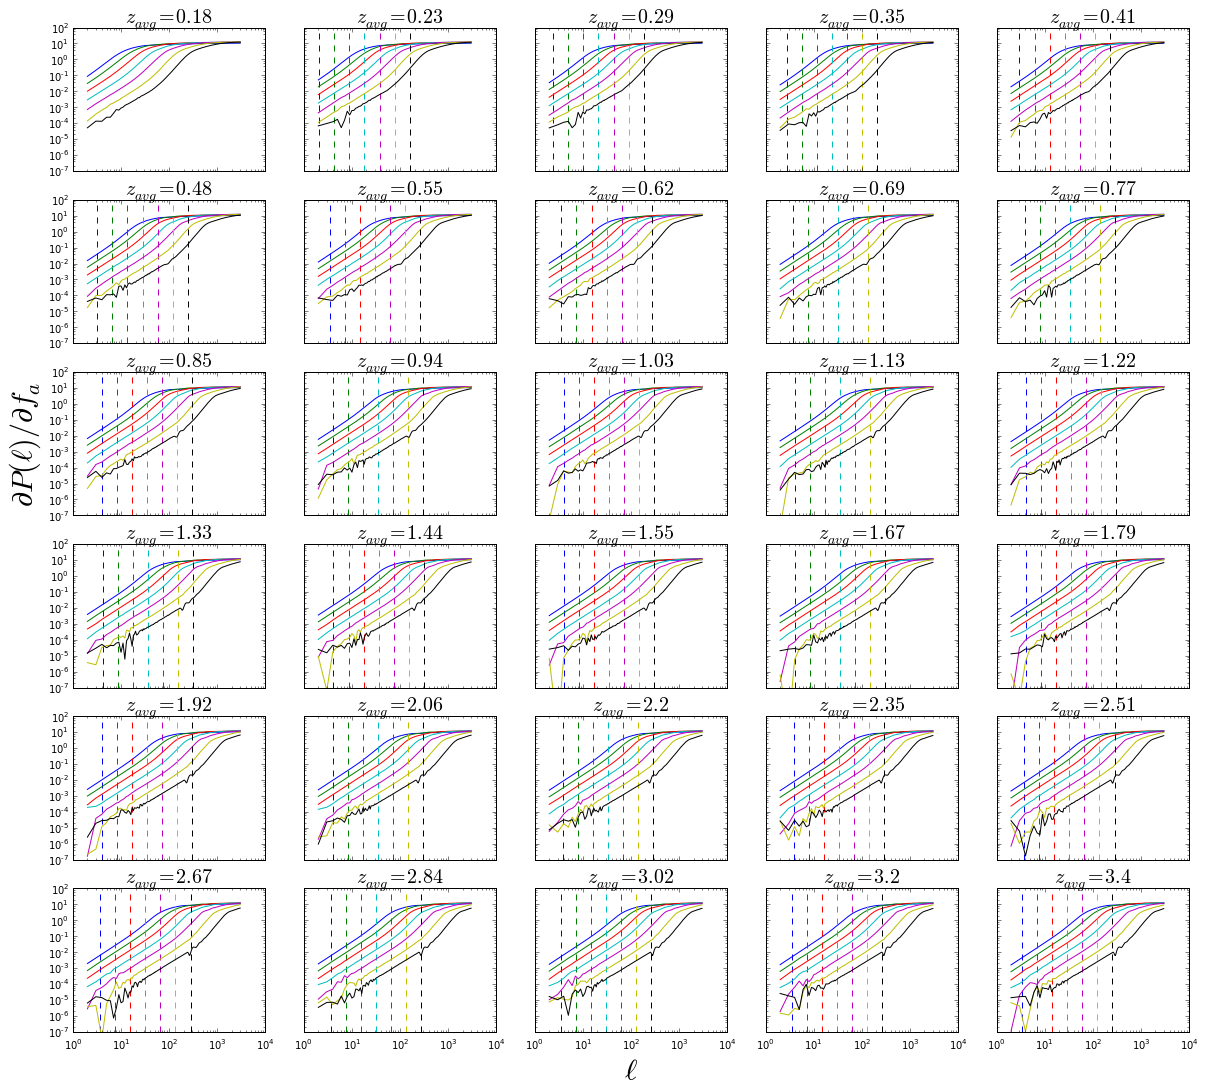

In [4]:
#############################################
#############################################
######                                 ######
######    Plot Derivative Galleries    ######
######                                 ######
#############################################
#############################################

ma_short = ['1*10^{-29}','4.2*10^{-29}','1.8*10^{-28}','7.5*10^{-28}','3.2*10^{-27}','1.3*10^{-26}','5.6*10^{-26}','2.4*10^{-25}','1.0*10^{-24}','2.0*10^{-23}','1.0*10^{-22}']
fa_short = ['0.01\%','2.5\%','5\%','7.5\%','10\%','12.5\%','15\%','17.5\%','20\%']

rows = 6
columns = 5
fig,ax = plt.subplots(rows,columns,sharex = 'all',sharey = 'all')
fig.set_figheight(3*rows)
fig.set_figwidth(4*columns)
list1 = np.arange(rows)
list2 = np.arange(columns)
pair =  list(itertools.product(list1,list2))

vline = ['b','g','r','c','m','y','k']

for i in range(7):
    for j in range(rows*columns):
        ###  change param number here  ###
        ax[pair[j][0],pair[j][1]].plot(lgoal,np.abs(derivs[2][i][j]/pl[2][i][5][j]),label = r'$m_a = %s e\rm{V}$'%(ma_short[i]))
        ax[pair[j][0],pair[j][1]].set_title(r'$z_{avg} = %s$'%(np.round(zavg[j],2)),size = 20)
        ax[pair[j][0],pair[j][1]].axvline(x = ljeq[i][j],color = vline[i],linestyle = '--')
        ax[pair[j][0],pair[j][1]].set_xscale('log')
        ax[pair[j][0],pair[j][1]].set_yscale('log')
        #ax[0,2].legend(bbox_to_anchor=(0.5, 1.35),loc = 'center',ncol = 7,fontsize = 12)
#         ###  change param here  ###
        ax[2,0].set_ylabel(r'$\partial{P(\ell)}/\partial{f_a}$',size = 30)
        ax[5,2].set_xlabel(r'$\ell$',size = 30)
# ##  change param name here (both) ###
# fig.text(0.5, 0.98, r'Axion Fraction Derivative Gallery', ha='center', va='center',size = 30)
# plt.savefig('plots/fa_deriv_gallery.pdf')


# for i in range(rows*columns):
#     ax[pair[i][0],pair[i][1]].plot(lgoal,derivs[2][i][0],color = 'r',label = r'$z_{avg} = %s$'%(np.round(zavg[0],2)))
#     ax[pair[i][0],pair[i][1]].plot(lgoal,derivs[2][i][29],color = 'b',label = r'$z_{avg} = %s$'%(np.round(zavg[29],2)))
#     for j in range(1,29):
#         ax[pair[i][0],pair[i][1]].plot(lgoal,derivs[2][i][j],color = 'k')
#     ax[pair[i][0],pair[i][1]].set_xscale('log')
#     ax[pair[i][0],pair[i][1]].set_title(r'$m_a = %s e\rm{V}$'%(ma_short[i]))
#     ax[0,1].legend(bbox_to_anchor=(0.5, 1.25),loc = 'center',ncol = 2,fontsize = 12)
#     ax[1,0].set_ylabel(r'$\partial{P(\ell)}/\partial{f_a}$',size = 20)
#     ax[2,1].set_xlabel(r'$\ell$',size = 20)
# fig.text(0.5, 1.01, r'Axion Fraction Derivative Gallery (2)', ha='center', va='center',size = 20)
# plt.savefig('plots/fa_deriv_gallery2.pdf')


#divide by fiducial P(l) -- and multiply by step size to be of order unity

In [103]:
##############################################
##############################################
######                                  ######
######    Plot Axion Effects on P(l)    ######
######                                  ######
##############################################
##############################################

# fig,ax = plt.subplots(1,2,sharex = 'all',sharey = 'all')
# fig.set_figheight(6)
# fig.set_figwidth(16)

# for i in range(7):
#     ax[0].plot(lgoal,pl[2][5][i][0],label = r'$f_a = %s$'%(fa_short[i]),linewidth = 1.5)
#     ax[0].set_xlabel(r'$\ell$',size = 20)
#     ax[0].set_ylabel(r'$P(\ell)$',size= 20)
#     ax[0].set_xscale('log')
#     ax[0].set_yscale('log')
#     ax[0].set_title(r'$m_a = %s e\rm{V}$ ,  $z_{avg} = %s$'%(ma_short[5],np.round(zavg[0],2)),size = 20)
#     ax[0].legend(frameon = False,loc = 'lower left')
#     ax[1].plot(lgoal,pl[2][i][5][0],label = r'$m_a = %s e\rm{V}$'%(ma_short[i]),linewidth = 1.5)
#     ax[1].set_xlabel(r'$\ell$',size = 20)
#     ax[1].set_ylabel(r'$P(\ell)$',size= 20)
#     ax[1].set_title(r'$f_a = %s$ ,  $z_{avg} = %s$'%(fa_short[5],np.round(zavg[0],2)),size = 20)
#     ax[1].set_xscale('log')
#     ax[1].set_yscale('log')
#     ax[1].legend(frameon = False,loc = 'lower left')
# plt.savefig('pl_axion.pdf')

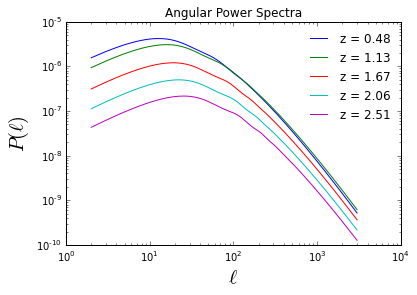

In [64]:
param_number = 4
mass_number = 0

index = [5,13,18,21,24]
param_names = ['\Omega_b','\Omega_{cdm}','f_a','n_s','H_0']
scale = [1.,1.,0.5,0.25,0.125]
fudge = [1,1,1,1,1]

# for i in range(len(index)):
#     plt.plot(lgoal,derivs[param_number][mass_number][index[i]],label = 'z = %s'%(np.round(zavg[index[i]],2)))
# plt.xlabel(r'$\ell$,size = 20')
# plt.ylabel(r'$\partial{P(\ell)}/\partial{\rm{%s}}$'%(param_names[param_number]),size = 20)
# plt.legend(frameon = False)
# plt.title(r'Angular Power Spectra Axion Derivatives')

for i in range(len(index)):
    plt.loglog(lgoal,fudge[i]*scale[i]*pl[param_number][5][mass_number][i],label = 'z = %s'%(np.round(zavg[index[i]],2)))
plt.xlabel(r'$\ell$',size = 20)
plt.ylabel(r'$P(\ell)$',size = 20)
plt.legend(frameon = False)
plt.title(r'Angular Power Spectra')
plt.savefig('plots/pl.pdf')

In [105]:
#############################################
#############################################
######                                 ######
######     Compute Fiducial P(l)'s     ######
######                                 ######
#############################################
#############################################

print 'loading fiducial data...'
k_fid = []
k_fid.append([loadtxt('data/ma_0_fiducial_%s.dat'%(y),unpack=True,usecols=[0]) for y in range(numz)])
pk_fid = []
pk_fid.append([loadtxt('data/ma_0_fiducial_%s.dat'%(y),unpack=True,usecols=[1]) for y in range(numz)])

print 'constructing fiducial arrays...'
pkd_fid = pk_fid*np.power(k_fid,3.)/(2.*np.square(np.pi))
mod_fid = hz*da*np.square(wi)
pkd_fid = np.reshape(pkd_fid,(1,1,numz,662))
mod_fid = np.reshape(mod_fid,(1,30,numz,1))
lreal_fid = k_fid*np.reshape(da,(1,1,numz,1))
m_fid = pkd_fid*mod_fid
lgoal_fid = np.arange(2,3000,1)

print 'interpolating fiducial...'
integrand_fid = []
for y in range(30):
    hold = []
    for l in range(numz):
        hold.append(np.interp(lgoal_fid,lreal_fid[0][0][l],m_fid[0][y][l]))
    integrand_fid.append(hold)
# print np.shape(integrand_fid)

nibar_noise = []
for i in range(len(zlist)):
    #wi.append(window(z,i)[0])
    nibar_noise.append(window(z,i)[1])
noise = np.sqrt((2*np.square(pl))/(fsky*(2.*lgoal_fid+1.)))
nibar_norm = nibar_noise*np.asarray(1.18181*np.power(10.,7))
noise2 = np.reshape(noise[0][0][0],(30,2998))

print 'integrating fiducial...'
integrated_fid = 2.*np.square(np.pi)/(c*np.power(lgoal,3))*np.trapz(integrand_fid,z,dz,1)+noise2
print np.shape(integrated_fid)
pl_fid = np.reshape(integrated_fid,(1,1,30,2998))
pl_inv = 1./pl_fid

print 'DONE'

loading fiducial data...
constructing fiducial arrays...
interpolating fiducial...
integrating fiducial...
(30, 2998)
DONE


In [84]:
###############################################
###############################################
######                                   ######
######    Compute Power Spectra Noise    ######
######                                   ######
###############################################
###############################################

nibar_noise = []
for i in range(len(zlist)):
    #wi.append(window(z,i)[0])
    nibar_noise.append(window(z,i)[1])
noise = np.sqrt((2*np.square(pl))/(fsky*(2.*lgoal_fid+1.)))
nibar_norm = nibar_noise*np.asarray(1.18181*np.power(10.,7))
noise2 = np.reshape(noise[0][0][0],(30,2998))
print 'shape of noise matrix :  ',np.shape(noise)

shape of noise matrix :   (5, 11, 9, 30, 2998)


In [81]:
# fa_list = np.transpose(constraints,(2,0,1))[2]
# print np.shape(fa_list)
# mins = []
# for i in range(9):
#     mins.append(np.amin(fa_list[i]))
# plt.fill_between(ma,0.,mins,alpha = 0.2)
# #plt.plot(ma,mins)
# plt.xscale('log')
# plt.xlabel(r'$m_a (e\rm{V})$',size = 20)
# plt.ylabel(r'$\Omega_{a}/\Omega_{dm}$',size = 20)
# plt.title(r'Forecasted LSST Sensitivity to Dark Matter Axions',size = 13)

In [12]:
# dloga_table and grhoax_table are both log10 (10** to undo)
# a is only in the range for which a < a_osc --> after that just use a^3 scaling
# need to normalize grhoax_table -- find in fortran code

# Trace(1/Pii+1/Pjj)
# shot noise + cosmic variance
# shot noise only
# 1,1 is first bin, 2,2 is second bin, etc.

# k_eq,k_j
# l = k*da
# plot vertical lines for l_eq and l_jeans
# log of absolute value and include all masses

# explain l,k,z technique + where power spectra p(k) come from

In [107]:
###############################################
###############################################
######                                   ######
######    Prep for Fisher Computation    ######         #toy version of zbin inversion
######                                   ######
###############################################
###############################################

#removes the parameter value entries by taking only the central valued run (justified b/c we evaluate the derivatives at the central values)
pl2 = np.transpose(pl,(2,1,3,0,4))[5]
#inverted power spectra
pl2_inv = np.divide(1.,pl2)
#just rearranging the derivative matrix "derivs" into "deriv2"
rederiv = np.transpose(derivs,(2,1,0,3))
test = np.reshape(np.matrix.repeat(rederiv,repeats = 30,axis = 0),(30,30,11,5,2998))
deriv2 = np.transpose(test,(2,3,4,0,1))
#computes the pre-factor in the Fisher computation
ell_mod = ((2.*lgoal)+1.)/2.

print 'DONE'

DONE


In [108]:
#######################################################
#######################################################
######                                           ######
######    Compute Noiseless Covariance Matrix    ######         #toy version of zbin inversion
######                                           ######
#######################################################
#######################################################

#parameter derivatives
deriv3 = np.transpose(rederiv,(1,2,3,0))
#power spectra
plinv3 = np.transpose(pl2_inv,(0,2,3,1))

#creates fisher matrix entries F_ab
in_trace = []
# only looping over 9 of 11 masses b/c the derivatives for 2 are too noisy
for i in range(9):
    hold1 = []
    for j in range(5):
        hold2 = []
        for y in range(5):
            hold2.append(deriv3[i][j]*plinv3[i][j]*deriv3[i][y]*plinv3[i][y])
        hold1.append(hold2)
    in_trace.append(hold1)
    
#computes the trace (sum diagonal entries) of the Fisher matrix
trace = np.sum(in_trace,axis = 4)
#sums over ell and multiplies by additional prefactors
summed = fsky*np.sum(ell_mod*trace,axis = 3)
#inverts Fisher matrix to obtain covariance matrix
cov = np.linalg.inv(summed)

#selects just the axion fraction constraints from the covariance matrix
axcon = []
for i in range(9):
    axcon.append(np.sqrt(np.diag(cov[i])[2]))

print axcon
print 'DONE'

[0.00040380413439458532, 0.00039775839867514488, 0.00042246928352216752, 0.00031538137776192617, 0.00017601389682327757, 0.00016237971584454373, 0.00026247056305824006, 0.00024090827636930281, 0.00018134347550434823]
DONE


In [19]:
#######################################################
#######################################################
######                                           ######
######    Compute Covariance Matrix (w/ Noise)   ######          #toy version of zbin inversion
######                                           ######
#######################################################
#######################################################

#noise matrix
noise3 = np.transpose(noise,(2,1,3,0,4))[5]
#adds noise to power spectra
pl3noise = pl2+noise3
#inverts power spectra (w/ noise - implicit from here on out for anything denoted "_noise")
pl3noise_inv = np.divide(1.,pl3noise)
#just rearranging indices
plinv3_noise = np.transpose(pl3noise_inv,(0,2,3,1))

#creates fisher matrix entries F_ab
in_trace_noise = []
# only looping over 9 of 11 masses b/c the derivatives for 2 are too noisy
for i in range(9):
    hold1_noise = []
    for j in range(5):
        hold2_noise = []
        for y in range(5):
            hold2_noise.append(deriv3[i][j]*plinv3_noise[i][j]*deriv3[i][y]*plinv3_noise[i][y])
        hold1_noise.append(hold2_noise)
    in_trace_noise.append(hold1_noise)

#computes the trace (sum diagonal entries) of the Fisher matrix
trace_noise = np.sum(in_trace_noise,axis = 4)
#sums over ell and multiplies by additional prefactors
summed_noise = fsky*np.sum(ell_mod*trace_noise,axis = 3)
#inverts Fisher matrix to obtain covariance matrix
cov_noise = np.linalg.inv(summed_noise)

#selects just the axion fraction constraints from the covariance matrix
axcon_noise = []
for i in range(9):
    axcon_noise.append(np.sqrt(np.diag(cov_noise[i])[2]))

print 'DONE'

#test a couple ell's to be sure 
#try the 30x30 at small # of ell's

DONE


In [198]:
# print np.shape(pl),np.shape(derivs)
# pl2 = np.transpose(pl,(2,1,0,3,4))[4]
print np.shape(pl2)
# pl3 = []
# for i in range(9):
#     pl3.append(pl2[i])
# print np.shape(pl3)
# pl4 = np.transpose(pl3,(0,3,1,2))
print np.shape(pl4)

# pl5 = []
# for i in range(9):
#     h1 = []
#     for j in range(2998):
#         h2 = []
#         for e in range(5):
#             h3 = []
#             for m in range(30):
#                 h4 = []
#                 for y in range(30):
#                     h4.append(np.matmul(pl4[i][j][e][m],pl4[i][j][e][y]))
#                 h3.append(h4)
#             h2.append(h3)
#         h1.append(h2)
#     pl5.append(h1)
# print np.shape(pl5)
# pl6 = np.linalg.inv(pl5)
# print np.shape(pl6)
                    


(11, 5, 30, 2998)
(9, 2998, 5, 30)


In [175]:
# rederivs = np.transpose(derivs,(1,2,0,3))
# print np.shape(rederivs),np.shape(pl2)

# #possibly need to invert pl2 before cross-correlating the zbins

# #creates the pl parameter correlation (5x5) then repeats the 30 dimension to match the 30x30 zbin correlation
# pl_matrix = np.zeros((9,30,30,5,2998))
# for i in range(9):
#     for j in range(30):
#         for e in range(30):
#             for y in range(5):
#                 pl_matrix[i][j][e][y] = pl2[i][j][y]*pl2[i][e][y]
# print np.shape(pl_matrix)
# pl_expanded = np.reshape(np.matrix.repeat(pl_matrix,repeats = 5,axis = 3),(9,30,30,5,5,2998))
# print np.shape(pl_expanded)

# #creates the zbin correlation (30x30) then repeats the 5 dimension to match the 5x5 parameter correlation
# deriv_matrix = np.zeros((9,30,5,5,2998))
# for i in range(9):
#     for j in range(30):
#         for e in range(5):
#             for y in range(5):
#                 deriv_matrix[i][j][e][y] = rederivs[i][j][y]*rederivs[i][e][y]
# print np.shape(deriv_matrix)
# deriv_expanded = np.reshape(np.matrix.repeat(deriv_matrix,repeats = 30,axis = 1),(9,30,30,5,5,2998))
# print np.shape(deriv_expanded)

# #inverts the 30x30 zbin matrices
# pl_transpose = np.transpose(pl_expanded,(0,3,4,5,1,2))
# pl_inverted = np.zeros((9,5,5,2998,30,30))
# for i in range(9):
#     for j in range(5):
#         for e in range(5):
#             for y in range(2998):
#                 pl_inverted[i][j][e][y] = np.linalg.pinv(pl_transpose[i][j][e][y])
# print np.shape(pl_inverted)
# pl_inverted2 = np.transpose(pl_inverted,(0,4,5,1,2,3))
# print np.shape(pl_inverted2)

#np.matmul performs the multiplication on the last two indices

#sum over ell before doing trace (for computation time)
#matrix mult before ell_sum

# pl_tran = np.transpose(pl_inverted2,(0,5,3,4,1,2))
# deriv_tran = np.transpose(deriv_expanded,(0,5,3,4,1,2))
# print np.shape(pl_tran),np.shape(deriv_tran)
# matmul = np.matmul(pl_tran,np.matmul(deriv_tran,np.matmul(pl_tran,deriv_tran)))
# print np.shape(matmul)
# trace = np.trace(matmul,axis1 = 4,axis2 = 5)
print np.shape(trace)

ell_mod2 = np.reshape(ell_mod,(1,2998,1,1))
fisher = fsky*np.sum(ell_mod2*trace,axis = 1)
print np.shape(fisher)


# pl_ellsum = np.sum(ell_mod2*pl_inverted2,axis = 5)
# deriv_ellsum = np.sum(ell_mod2*deriv_expanded,axis = 5)
# print np.shape(pl_ellsum),np.shape(deriv_ellsum)

#perform the matrix multiplication and trace that yields the fisher matrix
# fisher_pl = np.transpose(pl_ellsum,(0,3,4,1,2))
# fisher_deriv = np.transpose(deriv_ellsum,(0,3,4,1,2))
# matmul = np.matmul(fisher_pl,np.matmul(fisher_deriv,np.matmul(fisher_pl,fisher_deriv)))
# print np.shape(matmul)
# fisher = fsky*np.trace(matmul,axis1 = 3,axis2 = 4)
# print np.shape(fisher)

#extract the parameter constraints via the covariance matrix
constraint_num = 0
cov = np.linalg.inv(fisher)
print np.shape(cov)
axcon3 = []
for i in range(9):
    axcon3.append(np.sqrt(np.diag(cov2[i])[constraint_num]))
print axcon3

# matrix = np.zeros(9,30,30,5,5,2998)
# for i in range(9):
#     for j in range(30):
#         for e in range(30):
#             for y in range(5):
#                 for r in range(5):
#                     matrix[i][j][e][y][r] = 


(9, 2998, 5, 5)
(9, 5, 5)
(9, 5, 5)
[4.5770840432356492e-09, 4.5546641070941364e-09, 4.5466831937934174e-09, 4.5619581162222357e-09, 4.5452079305065273e-09, 4.5415435684259274e-09, 4.6171420134170613e-09, 4.536804983312825e-09, 4.5194488927333695e-09]


In [24]:
# print np.shape(in_trace_noise)
ell_mod2 = np.reshape(ell_mod,(1,1,1,2998,1))
fsky2 = np.reshape(fsky,(1,1,1,1,1))
sum_first = in_trace_noise*ell_mod2*fsky2
# print np.shape(sum_first)
ell_sum = np.sum(sum_first,axis = 3)
# print np.shape(ell_sum)
matrix2 = np.zeros((9,5,5,30,30))
# print np.shape(matrix2)
for i in range(9):
    for j in range(5):
        for e in range(5):
            for y in range(30):
                for r in range(30):
                    matrix2[i][j][e][y][r] = ell_sum[i][j][e][y]*ell_sum[i][j][e][r]
# print np.shape(matrix2)

def inv(m,i,j,y):
    shape = np.eye(m.shape[3], m.shape[4])
    return np.linalg.lstsq(m[i][j][y], shape)[0]

# matrix2_inv = np.linalg.inv(matrix2)
matrix2_inv = []
for i in range(9):
    h1 = []
    for j in range(5):
        h2 = []
        for y in range(5):
            h2.append(inv(matrix2,i,j,y))
        h1.append(h2)
    matrix2_inv.append(h1)
print np.shape(matrix2_inv)

trace2 = np.trace(matrix2,axis1 = 3,axis2 = 4)
print np.shape(trace2)
cov2 = np.linalg.inv(trace2)
print np.shape(cov2)
axcon2 = []
for i in range(9):
    axcon2.append(np.sqrt(np.diag(cov2[i])[2]))
print axcon2

print 'DONE'

(9, 5, 5, 30, 30)
(9, 5, 5)
(9, 5, 5)
[1.1688613307409006e-08, 1.064468748482218e-08, 1.1104187254399255e-08, 1.2073519521382677e-08, 8.3793659102409552e-09, 7.6520891695591578e-09, 1.7855413155015449e-08, 1.843208201179665e-08, 2.4390011322759309e-08]
DONE


In [102]:
trace_first = sum_first
print np.shape(trace_first)

matrix3 = np.zeros((9,5,5,2998,30,30))
# print np.shape(matrix2)
for i in range(9):
    for j in range(5):
        for e in range(5):
            for g in range(2998):
                for y in range(30):
                    for r in range(30):
                        matrix3[i][j][e][g][y][r] = trace_first[i][j][e][g][y]*trace_first[i][j][e][g][r]

(9, 5, 5, 2998, 30)


KeyboardInterrupt: 

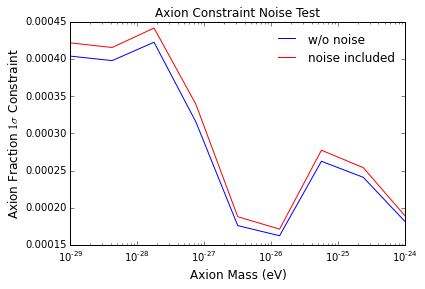

In [80]:
###########################################################
###########################################################
######                                               ######
######    Plot Axion Constraints (w/ + w/o noise)    ######
######                                               ######
###########################################################
###########################################################

plt.plot(ma,axcon,'b',label = 'w/o noise')
plt.plot(ma,axcon_noise,'r',label = 'noise included')
plt.xscale('log')
plt.legend(frameon = False,loc = 'upper right')
plt.xlabel('Axion Mass (eV)',size = 12)
plt.ylabel('Axion Fraction $1\sigma$ Constraint',size = 12)
plt.title('Axion Constraint Noise Test')
plt.savefig('plots/constraints.pdf')

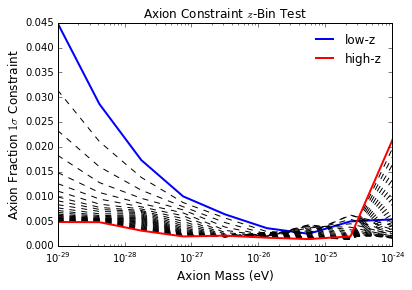

In [88]:
###########################################################
###########################################################
######                                               ######
######    Shows what z-bins are most constraining    ######
######                                               ######
###########################################################
###########################################################

#rearranges the fisher matrix to avoid summing over redshift bin
ztrace = np.transpose(in_trace_noise,(4,0,1,2,3))
#sums over ell
zsum = fsky*np.sum(ell_mod*ztrace,axis = 4)
#computes the covariance matrix for each redshift bin
zcov = np.linalg.inv(zsum)

#copmutes the parameter constraints at each redshift bin
zcon = []
for i in range(30):
    hold = []
    for j in range(9):
        hold.append(np.sqrt(np.diag(zcov[i][j])))
    zcon.append(hold)

#rearranges constraints for plotting purposes
zplot = np.transpose(zcon,(2,0,1))

#plots the parameter constraints at each redshift bin
plt.plot(ma,zplot[2][0],label = 'low-z',color = 'b',lw = 2)
for i in range(1,29):
    plt.plot(ma,zplot[2][i],'k--')
plt.plot(ma,zplot[2][29],label = 'high-z',color = 'r',lw = 2)
plt.legend(frameon = False,loc = 'upper right')
plt.xscale('log')
plt.xlabel('Axion Mass (eV)',size = 12)
plt.ylabel('Axion Fraction $1\sigma$ Constraint',size = 12)
plt.title('Axion Constraint $z$-Bin Test')
plt.savefig('plots/z_constraints.pdf')

In [139]:
################################################
################################################
######                                    ######
######    Computes Ellipse Information    ######
######                                    ######
################################################
################################################

#functions for computing the ellipse axes and angle
def afunc(sx,sy,sxy):
    term1 = (np.square(sx)+np.square(sy))/2.
    term2 = (np.square(np.square(sx)-np.square(sy))/4.)+np.square(sxy)
    a = np.sqrt(term1+np.sqrt(term2))
    return a
def bfunc(sx,sy,sxy):
    term1 = (np.square(sx)+np.square(sy))/2.
    term2 = (np.square(np.square(sx)-np.square(sy))/4.)+np.square(sxy)
    b = -np.sqrt(np.abs(term1-np.sqrt(term2)))
    return b
def theta(sx,sy,sxy):
    th = np.arctan((2.*sxy)/(np.square(sx)-np.square(sy)))/2.
    return th

#computes the ellipse axes and angle
amat = []
bmat = []
thmat = []
for i in range(9):
    a1 = []
    b1 = []
    th1 = []
    for j in range(5):
        a2 = []
        b2 = []
        th2 = []
        for y in range(5):
            a2.append(afunc(cov[i][j][j],cov[i][y][y],cov[i][j][y]))
            b2.append(bfunc(cov[i][j][j],cov[i][y][y],cov[i][j][y]))
            th2.append(theta(cov[i][j][j],cov[i][y][y],cov[i][j][y]))
        a1.append(a2)
        b1.append(b2)
        th1.append(th2)
    amat.append(a1)
    bmat.append(b1)
    thmat.append(th1)

#converts the ellipse angle from radians to degrees (necessary for later plotting)
rad_to_deg = np.reshape(180./np.pi,(1,1,1))
deg_theta = thmat*rad_to_deg

print 'DONE'

DONE


/Users/etrott12/Downloads/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars


[  1.00000000e-29   4.21696503e-29   1.77827941e-28   7.49894209e-28
   3.16227766e-27   1.33352143e-26   5.62341325e-26   2.37137371e-25
   1.00000000e-24]
Ellipse(67.44,0.1202;0.0473669041955x-0.00301825269727)
Ellipse(67.44,0.1202;0.0401450274039x-0.00315045810999)
Ellipse(67.44,0.1202;0.0275828327256x-0.00322104341925)
Ellipse(67.44,0.1202;0.0214115848063x-0.00207599388461)
Ellipse(67.44,0.1202;0.0216322187653x-0.00195170430257)
Ellipse(67.44,0.1202;0.0213167028992x-0.00210907578224)
Ellipse(67.44,0.1202;0.0241152465192x-0.0017853022699)
Ellipse(67.44,0.1202;0.0260592165363x-0.00144850407943)
Ellipse(67.44,0.1202;0.0229580938359x-0.00181245969516)


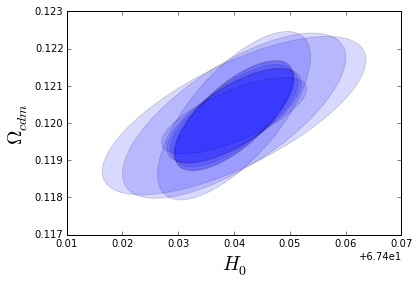

In [142]:
############################################
############################################
######                                ######
######    Plot Degeneracy Ellipses    ######
######                                ######
############################################
############################################


from matplotlib.patches import Ellipse
from matplotlib.collections import PatchCollection
import matplotlib as mpl
%matplotlib inline
from matplotlib import pyplot as plt

degen1 = 4
degen2 = 1
degen_m = 4
center = [params[degen1][5],params[degen2][5]]
print ma

fig,ax = plt.subplots()
for i in range(9):
    ells = Ellipse(xy=center, width=amat[i][degen1][degen2], height=bmat[i][degen1][degen2], angle = 180+deg_theta[i][degen1][degen2],alpha = 0.15)
    print ells
    ax.add_patch(ells)

ax.autoscale()
ax.set_xlabel(r'$%s$'%(param_names[degen1]),size = 20)
ax.set_ylabel(r'$%s$'%(param_names[degen2]),size = 20)
# ax.set_xscale('log')
# ax.set_yscale('log')

In [98]:
###################################################
###################################################
######                                       ######
######    Plot Degeneracy Ellipse Gallery    ######
######                                       ######
###################################################
###################################################

# choose redshift and figure out when shot noise becomes important (constraints blow up)
#show fisher constraints for 5 redshift bins and then combined

rows = 5
columns = 5
center = [params[degen1][5],params[degen2][5]]
list1 = np.arange(rows)
list2 = np.arange(columns)
pair =  list(itertools.product(list1,list2))

ell = []
for i in range(9):
    hold1 = []
    for j in range(5):
        hold2 = []
        for y in range(5):
            hold2.append(Ellipse(xy=center, width=amat[i][j][y], height=bmat[i][j][y], angle = 180+deg_theta[i][j][y], alpha = 0.15))
        hold1.append(hold2)
    ell.append(hold1)
print np.shape(ell)

print ell[0][0]

# fig,ax = plt.subplots(rows,columns,sharex = 'all',sharey = 'all')
# fig.set_figheight(3*rows)
# fig.set_figwidth(4*columns)

# print np.shape(pair)
# for i in range(rows*columns):
#     for j in range(9):
#         ax[pair[i][0],pair[i][1]].add_patch(ell[j][0][0])
#         ax[pair[i][0],pair[i][1]].autoscale()

#         ell = mpl.patches.Ellipse(xy=mean, width=amat[0][0][0], height=bmat[0][0][0], angle = 180+deg_theta[0][0][0], alpha = 0.2)
#         ax[pair[i][j],pair[i][j]].plot(lgoal,np.abs(derivs[2][i][j]/pl[2][i][5][j]),label = r'$m_a = %s e\rm{V}$'%(ma_short[i]))
#         ax[pair[j][0],pair[j][1]].set_title(r'$z_{avg} = %s$'%(np.round(zavg[j],2)),size = 20)

Ellipse(67.44,0.1250375;0.000316190898925x-0.000316190867313) [<matplotlib.patches.Ellipse object at 0x1b7f90990>]
Ellipse(67.44,0.1250375;0.000440484451421x-0.000440484164803) [<matplotlib.patches.Ellipse object at 0x1b7f90990>, <matplotlib.patches.Ellipse object at 0x1b8b9dbd0>]
Ellipse(67.44,0.1250375;0.000266616748168x-0.000266616679562) [<matplotlib.patches.Ellipse object at 0x1b7f90990>, <matplotlib.patches.Ellipse object at 0x1b8b9dbd0>, <matplotlib.patches.Ellipse object at 0x1b7f90a90>]
Ellipse(67.44,0.1250375;0.000370600097752x-0.000370599530505) [<matplotlib.patches.Ellipse object at 0x1b7f90990>, <matplotlib.patches.Ellipse object at 0x1b8b9dbd0>, <matplotlib.patches.Ellipse object at 0x1b7f90a90>, <matplotlib.patches.Ellipse object at 0x1b8b9d890>]
Ellipse(67.44,0.1250375;0.0472910267177x-0.00138832435953) [<matplotlib.patches.Ellipse object at 0x1b7f90990>, <matplotlib.patches.Ellipse object at 0x1b8b9dbd0>, <matplotlib.patches.Ellipse object at 0x1b7f90a90>, <matplotlib.